# Machine Learning Notes

This note book contains some notes i made whilst learning about machine learning. Feel free to copy/paste/steal.

## Probability notes

This link has a good description of likelihood estimation

https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

## Policy Gradients

This has a okish intro to policy gradients (although part 2 was never done)

https://towardsdatascience.com/an-intuitive-explanation-of-policy-gradient-part-1-reinforce-aa4392cbfd3c

The example simulation code compute the gradiants like so:

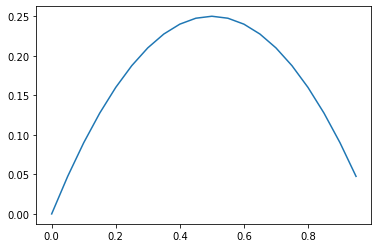

In [13]:

from matplotlib import pyplot as plt
import numpy as np
xs = np.arange(0,1,0.05)
y = lambda x: x * (1-x)
ys = [ y(x) for x in xs]
plt.plot(xs,ys)

In the doc it describes how the two update functions are the same via the chain rule. Here is the proof

The chain rule states if

\begin{align}
F(x) &= f(g(x)) \\
F'(x) &= f'(g(x)) * g'(x)
\end{align}

so starting with the log based update formula

\begin{align}
\theta_{t+1} = \theta_t + \alpha\hat{A}(a|s)\triangledown{ln(\pi_{\theta}(a|s)}
\end{align}

and remembering that the ML notation typically writes

\begin{align}
\triangledown{f(x)} = f'(x)
\end{align}

we can define the following

\begin{align}
g(x) &= \pi_{\theta}(a|s) \\
f(g(x)) &= ln(g(x))
\end{align}

so given (and subsituting $g(x)$ in the second step)

\begin{align}
f'(g(x)) &= \frac{1}{g(x)} \\
         &= \frac{1}{\pi_{\theta}(a|s)}
\end{align}

We arrive at proof that the two are the same (in the last step we simply use the ML notation and substiture $g(x)$)

\begin{align}
\theta_{t+1} - \theta_t &= \alpha\hat{A}(a|s)\triangledown{ln(\pi_{\theta}(a|s)} \\
                        &= \alpha\hat{A}(a|s)\frac{g'(x)}{\pi_{\theta}(a|s)} \\
                        &= \alpha\hat{A}(a|s)\frac{\triangledown\pi_{\theta}(a|s)}{\pi_{\theta}(a|s)} \\
\end{align}


### $\hat{A}$ vs $\hat{Q}$ function

In the proof i said nothing about $\hat{A}$ vs $\hat{Q}$. Firstly i read this doc, to remind me what the value function is

https://towardsdatascience.com/reinforcement-learning-value-function-57b04e911152

So $V^{\pi}(s)$ is the value of being in state $s$, which is the value of future expected rewards following policy $\pi$

\begin{align}
V^{\pi}(s) = \mathbb{E}\sum_{i=1}^{T}{\gamma^{i-1}r_i}
\end{align}

$\hat{A}$ is the "advantage" function describing the advantage of taking action $a_x$ over action $a_y$ in state $s$ and is defined by

\begin{align}
\hat{A}(a|s) &= \hat{Q}(a|s) - V(s)
\end{align}

This has the effect of rebaselining the update given the value of the current state. Remember the Q's capture the reward from state $s$ and an estimate of the maximum future reward. The aim is to reduce the variance when using this in a monte-carlo based method (such as REINFORCE)

We are not limited to using $V(s)$, so long as our base line is not a function of a specific action.

### Where is the cost function? ##

Remember that our expression for $\theta_{t+1}$ is the update rule we following during our optimisation algorithm of the form

\begin{align}
\theta_{t+1} = \theta_t - \alpha\triangledown{J(\theta)}
\end{align}

where $J(\theta)$ is a cost function. Therefor under policy gradients our cost function is $\hat{A}\ln{(\pi_{\theta}(a|s))}$


